<a href="https://colab.research.google.com/github/KrishGuptareal/Inter_IIT_material/blob/main/HighDimensional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install ripser

!pip install persim




  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.3/827.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.5 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18104 sha256=8f4de247cc1faacd5c83cbac2e8e56424aca029098a0ea4cc1d324119569f572
  Stored in directory: /root/.cache/pip/wheels/2a/fd/fe/f4b8fd82894e1d9e04040ef41dc5ae6eb7a8e9b0ef5a9402fe
Successfully built hopcroftkarp


In [3]:
import numpy as np
from sklearn.datasets import make_blobs
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt

In [4]:


def analyze_high_dimensional_data(X):
    """
    Extract geometric and topological insights from high-dimensional data
    """
    print(f"Analyzing data: {X.shape[0]} points in {X.shape[1]} dimensions")
    print("=" * 60)


    print("\n📐 GEOMETRIC INSIGHTS:")

    # 1.basic stats
    from scipy.spatial.distance import pdist
    distances = pdist(X)
    print(f"  • Average distance between points: {np.mean(distances):.2f}")
    print(f"  • Min distance: {np.min(distances):.2f}")
    print(f"  • Max distance: {np.max(distances):.2f}")

    # 2. Find clusters (geometric)
    from sklearn.cluster import DBSCAN
    eps = np.percentile(distances, 10)  # Use 10th percentile as epsilon
    clustering = DBSCAN(eps=eps, min_samples=5) #parameters need to be changed
    labels = clustering.fit_predict(X)
    n_clusters_geom = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"  • Clusters found (DBSCAN): {n_clusters_geom}")

    # === TOPOLOGICAL INSIGHTS ===
    print("\n🔷 TOPOLOGICAL INSIGHTS:")

    # Compute persistent homology
    result = ripser(X, maxdim=1)  # Look for components and loops

    # Analyze H0 (connected components)
    h0 = result['dgms'][0]
    h0_persistence = h0[h0[:, 1] < np.inf, 1] - h0[h0[:, 1] < np.inf, 0]
    significant_components = len(h0_persistence[h0_persistence > np.percentile(h0_persistence, 75)])
    print(f"  • Connected components: {len(h0)}")
    print(f"  • Significant components: {significant_components}")

    # Analyze H1 (loops)
    h1 = result['dgms'][1]
    if len(h1) > 0:
        h1_persistence = h1[:, 1] - h1[:, 0]
        significant_loops = len(h1_persistence[h1_persistence > np.percentile(h1_persistence, 75)])
        print(f"  • Loops detected: {len(h1)}")
        print(f"  • Significant loops: {significant_loops}")
    else:
        print(f"  • Loops detected: 0")

    # Visualize persistence diagrams
    print("\n📊 Generating persistence diagrams...")
    plot_diagrams(result['dgms'])
    plt.suptitle(f"Persistence Diagrams ({X.shape[1]}D data)")
    plt.tight_layout()
    plt.show()

    return result


EXAMPLE 1: Clustered Data
Analyzing data: 200 points in 50 dimensions

📐 GEOMETRIC INSIGHTS:
  • Average distance between points: 49.12
  • Min distance: 12.29
  • Max distance: 75.49
  • Clusters found (DBSCAN): 3

🔷 TOPOLOGICAL INSIGHTS:
  • Connected components: 200
  • Significant components: 50
  • Loops detected: 164
  • Significant loops: 41

📊 Generating persistence diagrams...


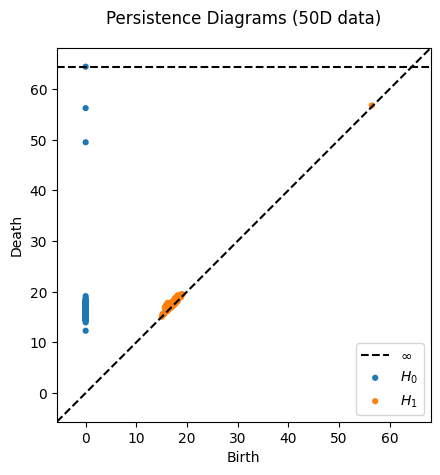


EXAMPLE 2: Circular Structure
Analyzing data: 200 points in 50 dimensions

📐 GEOMETRIC INSIGHTS:
  • Average distance between points: 1.46
  • Min distance: 0.65
  • Max distance: 2.45
  • Clusters found (DBSCAN): 1

🔷 TOPOLOGICAL INSIGHTS:
  • Connected components: 200
  • Significant components: 50
  • Loops detected: 167
  • Significant loops: 42

📊 Generating persistence diagrams...


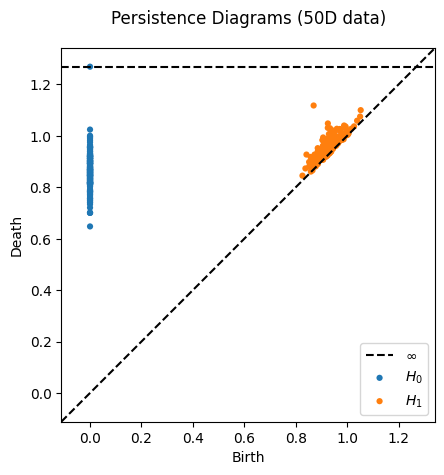

In [5]:
print("EXAMPLE 1: Clustered Data")
X_clusters, _ = make_blobs(n_samples=200, n_features=50, centers=3,
                            cluster_std=2.0, random_state=42)
result1 = analyze_high_dimensional_data(X_clusters)

# Example 2: Data with circular structure in high dimensions
print("\n" + "="*60)
print("EXAMPLE 2: Circular Structure")
from sklearn.datasets import make_circles

# Create circle in 2D, then embed in 50D
X_circle_2d, _ = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=42)
# Add random noise dimensions
X_circle = np.hstack([X_circle_2d, np.random.randn(200, 48) * 0.1])
result2 = analyze_high_dimensional_data(X_circle)

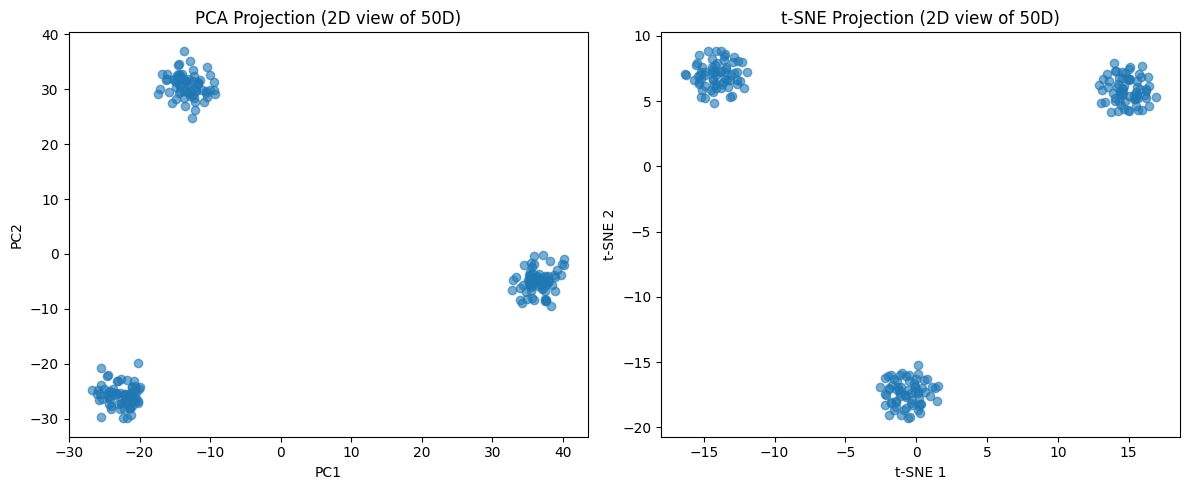

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Method 1: PCA (linear projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clusters)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.title('PCA Projection (2D view of 50D)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Method 2: t-SNE (non-linear, preserves local structure)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_clusters)

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6)
plt.title('t-SNE Projection (2D view of 50D)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.tight_layout()
plt.show()

In [ ]:
# things that can change
# 1.max dimension-->set manually
# 2.Threshold-->can be automatated
#   1.percentile based (take top k% persistances)
#   2.gap based (sort and take the largest gap index)
#   3.take median
# 3.normalise the data
# 4.distance metric(mostly euclidean....see for other options also)
# 5.clustering parameters
# 6.if sample size is large risper is slow try subsampling the dataset




# ---

#
# ```
# START
#   ↓
# Do you need normalization?
#   - Different scales? → YES, use StandardScaler
#   - Same scale? → NO
#   ↓
# How many points?
#   - < 2000 → Use all
#   - > 2000 → Subsample to 1000-2000
#   ↓
# What structure to detect?
#   - Just clusters → maxdim=0
#   - Clusters + loops → maxdim=1
#   - Full topology → maxdim=2
#   ↓
# How to set threshold?
#   - Use percentile (75th) → Most robust
#   - Use gap detection → More precise
#   - Visual inspection → When unsure
#   ↓
# Which metric?
#   - Most cases → euclidean
#   - Text/embeddings → cosine
#   - Special case → other


In [ ]:
#for building simplical complexes from the point cloud
#modify if you are given a set of values of eps
def build_simplicial_complex_manually(points, epsilon):
    """
    Build Vietoris-Rips complex step-by-step

    Process:
    1. Start with all points (0-simplices)
    2. Add edges between close points (1-simplices)
    3. Add triangles if all 3 edges exist (2-simplices)
    """
    from scipy.spatial.distance import cdist
    import numpy as np

    n = len(points)

    # Step 1: 0-simplices (vertices)
    vertices = list(range(n))
    print(f"0-simplices (vertices): {vertices}")

    # Step 2: 1-simplices (edges)
    # Compute pairwise distances
    dist_matrix = cdist(points, points)

    edges = []
    for i in range(n):
        for j in range(i+1, n):
            if dist_matrix[i, j] <= epsilon:
                edges.append((i, j))

    print(f"1-simplices (edges): {edges}")

    # Step 3: 2-simplices (triangles)
    # A triangle exists if all 3 edges exist
    triangles = []
    for i in range(n):
        for j in range(i+1, n):
            for k in range(j+1, n):
                # Check if all 3 edges exist
                if (i,j) in edges and (i,k) in edges and (j,k) in edges:
                    triangles.append((i, j, k))

    print(f"2-simplices (triangles): {triangles}")

    return {
        'vertices': vertices,
        'edges': edges,
        'triangles': triangles
    }

# Example
points = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [3, 3]
])

epsilon = 1.5
complex = build_simplicial_complex_manually(points, epsilon)
```

**Output**:
```
0-simplices (vertices): [0, 1, 2, 3]
1-simplices (edges): [(0, 1), (0, 2), (1, 2)]
2-simplices (triangles): [(0, 1, 2)]